* 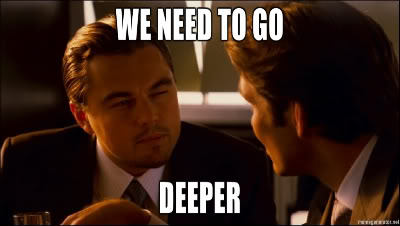

* https://arxiv.org/pdf/1409.4842.pdf

## **`We can implement an inception module directly using the Keras functional API`**

In [ ]:
import tensorflow as tf

from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.utils import plot_model

In [ ]:
print(tf.test.gpu_device_name())

/device:GPU:0


In [ ]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt


In [ ]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

In [ ]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


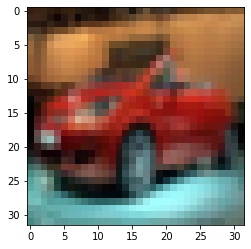

In [ ]:
plt.imshow(x_train[45]);

In [ ]:
## normalize data by divide by 255
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train =x_train[:7000]
x_test =x_test[:2000]


In [ ]:
print(x_train.shape)
print(x_test.shape)


(7000, 32, 32, 3)
(2000, 32, 32, 3)


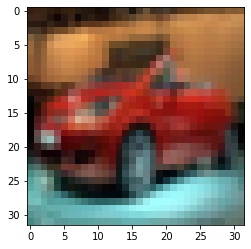

In [ ]:
## after normalize the data'
plt.imshow(x_train[45]);

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_cat_train = to_categorical(y_train[:7000], num_classes=10)
y_cat_test = to_categorical(y_test[:2000], num_classes=10)

In [ ]:
print(y_cat_train.shape)
print(y_cat_test.shape)

(7000, 10)
(2000, 10)


* With **`preserve_aspect_ratio=True`**, the aspect ratio is preserved, so size is the maximum for each dimension

In [ ]:
x_train = tf.image.resize(x_train, [224, 224], preserve_aspect_ratio=True)

In [ ]:
x_train.shape

TensorShape([7000, 224, 224, 3])

In [ ]:
x_test = tf.image.resize(x_test, [224, 224], preserve_aspect_ratio=True)


In [ ]:
print(x_train.shape)
print(x_test.shape)

(7000, 224, 224, 3)
(2000, 224, 224, 3)


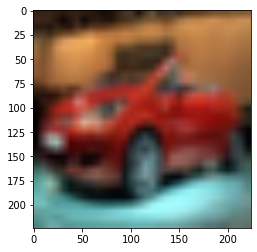

In [ ]:
plt.imshow(x_train[45]);


## Inception Module
* 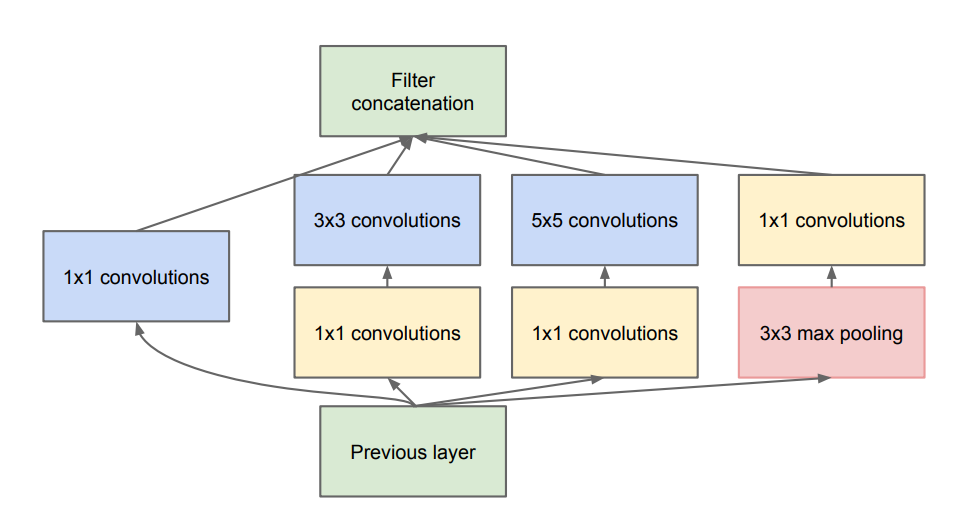

In [ ]:
# function for creating a projected inception module
def inception_module(layer_in, f1, f2_in, f2_out, f3_in, f3_out, f4_out):

	# 1x1 conv
	conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
 
	# 3x3 conv
	conv3 = Conv2D(f2_in, (1,1), padding='same', activation='relu')(layer_in)
	conv3 = Conv2D(f2_out, (3,3), padding='same', activation='relu')(conv3)
 
	# 5x5 conv
	conv5 = Conv2D(f3_in, (1,1), padding='same', activation='relu')(layer_in)
	conv5 = Conv2D(f3_out, (5,5), padding='same', activation='relu')(conv5)
 
	# 3x3 max pooling
	pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
	pool = Conv2D(f4_out, (1,1), padding='same', activation='relu')(pool)
 
	# concatenate filters, assumes filters/channels last
	layer_out = tf.keras.layers.Concatenate()([conv1, conv3, conv5, pool])
 
	return layer_out
  

In [ ]:
# # define model input
# visible = Input(shape=(256, 256, 3))

In [ ]:
# ## add inception block-1
# layer = inception_module(visible, 64, 96, 128, 16, 32, 32)

# ### add inception block 1
# layer = inception_module(layer, 128, 128, 192, 32, 96, 64)

In [ ]:
# model = Model(inputs = visible, outputs = layer)
# model.summary()

In [ ]:
# plot_model(model, show_shapes = True, show_layer_names = True, show_layer_activations = True)

In [ ]:
input = Input(shape=(224, 224, 3))

In [ ]:
import tensorflow as tf

from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, AveragePooling2D, Dropout, Flatten, Dense
from keras.utils import plot_model

In [ ]:
layer_1 = Conv2D(64, (7, 7), padding='same',strides = (2,2), activation = 'relu')(input)
max_pool_1 = MaxPooling2D((3,3), strides=(2,2), padding='same')(layer_1)

layer_2 = Conv2D(192, (1, 1), padding='same',strides = (1,1), activation = 'relu')(max_pool_1)
layer_3 = Conv2D(192, (3, 3), padding='same',strides = (1,1), activation = 'relu')(layer_2)
max_pool_2 = MaxPooling2D((3,3), strides=(2,2), padding='same')(layer_3)


In [ ]:
## add inception block 1
inception_1 = inception_module(max_pool_2, 64, 96, 128, 16, 32, 32)

## add inception block 2
inception_2 = inception_module(inception_1, 128, 128, 192, 32, 96, 64)

## max_pool
max_pool_3 = MaxPooling2D((3,3), strides=(2,2), padding='same')(inception_2) 


In [ ]:
## add inception block 3
inception_3 = inception_module(max_pool_3, 192, 96, 208, 16, 48, 64)

## add inception block 4
inception_4 = inception_module(inception_3, 160, 112, 224, 24, 64, 64)

## add inception block 5
inception_5 = inception_module(inception_4, 128, 128, 256, 16, 64, 64)

## add inception block 6
inception_6 = inception_module(inception_5, 112, 144, 288, 32, 64, 64)

## add inception block 7
inception_7 = inception_module(inception_6, 256, 160, 320, 32, 128, 128)


In [ ]:
## max_pool
max_pool_4 = MaxPooling2D((3,3), strides=(2,2), padding='same')(inception_7) 

In [ ]:
## add inception block 8
inception_7 = inception_module(max_pool_4, 256, 160, 320, 32, 128, 128)

## add inception block 9
inception_8 = inception_module(inception_7, 384, 192, 384, 48, 128, 128)

In [ ]:
## Avg Pool
Avg = AveragePooling2D(pool_size=(7, 7), strides=(1, 1))(inception_8)

In [ ]:
d = Dropout(0.4)(Avg)

In [ ]:
flat_1 = Flatten()(d)

In [ ]:
dense_1 = Dense(1000, activation='relu')(flat_1)

# output = Dense(1000, activation='softmax')(dense_1)
output = Dense(10, activation='softmax')(dense_1)


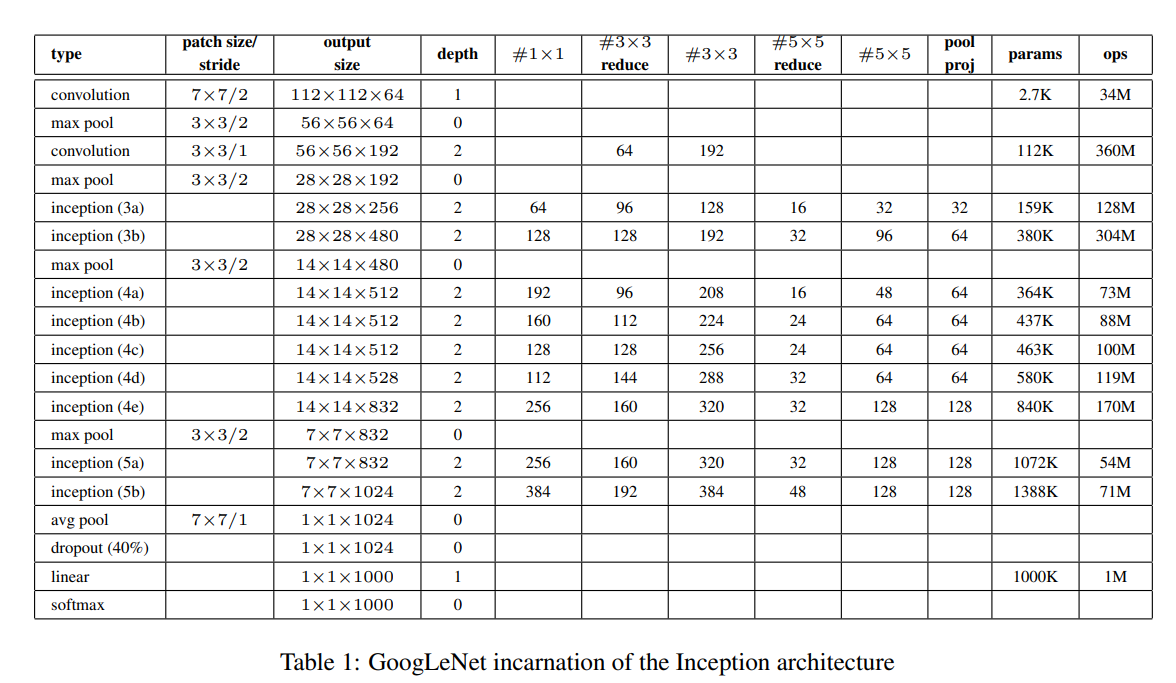

In [ ]:
model = Model(inputs = input, outputs = output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 112, 112, 64  9472        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 56, 56, 64)   0           ['conv2d[0][0]']                 
                                                                                              

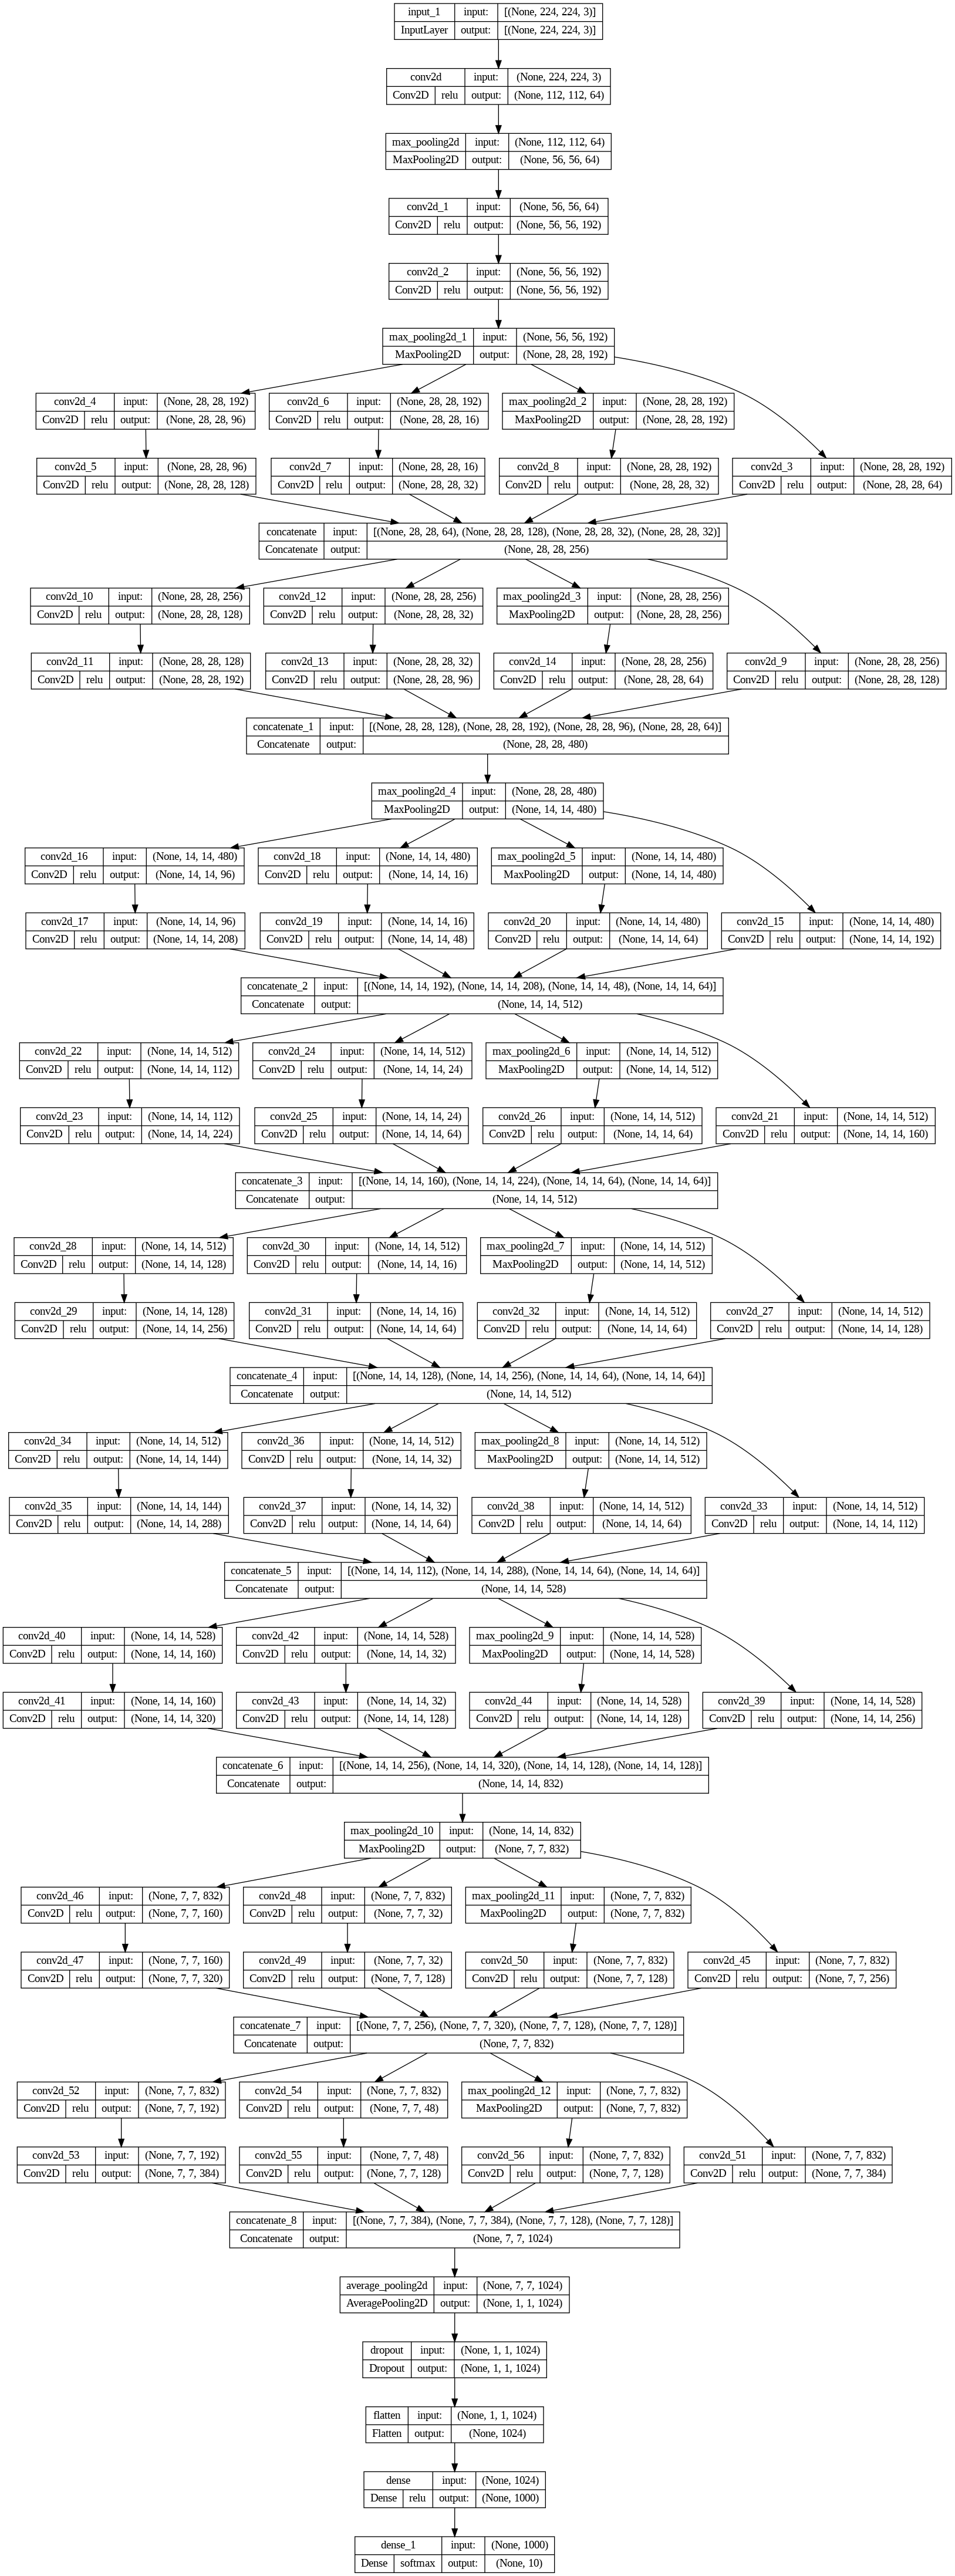

In [ ]:
plot_model(model, show_shapes = True, show_layer_names = True, show_layer_activations = True)


In [ ]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [ ]:
model.fit(x_train,
          y_cat_train,
          epochs = 13,
          verbose = 1,
          validation_data = (x_test, y_cat_test))


Epoch 1/13
219/219 [==============================] - 66s 153ms/step - loss: 2.3041 - accuracy: 0.0981 - val_loss: 2.3023 - val_accuracy: 0.1085
Epoch 2/13
219/219 [==============================] - 32s 147ms/step - loss: 2.3029 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.0965
Epoch 3/13
219/219 [==============================] - 29s 133ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3025 - val_accuracy: 0.1080
Epoch 4/13
219/219 [==============================] - 32s 146ms/step - loss: 2.3027 - accuracy: 0.0986 - val_loss: 2.3023 - val_accuracy: 0.1080
Epoch 5/13
219/219 [==============================] - 33s 150ms/step - loss: 2.3025 - accuracy: 0.0997 - val_loss: 2.3023 - val_accuracy: 0.1080
Epoch 6/13
219/219 [==============================] - 33s 148ms/step - loss: 2.3025 - accuracy: 0.1021 - val_loss: 2.3023 - val_accuracy: 0.1080
Epoch 7/13
219/219 [==============================] - 29s 134ms/step - loss: 2.3024 - accuracy: 0.1036 - val_loss: 2.3023 - val_ac

In [ ]:
type(model.history.history)

dict

In [ ]:
import pandas as pd
loss = pd.DataFrame(model.history.history)

In [ ]:
loss

,loss,accuracy,val_loss,val_accuracy
0,2.303745,0.096000,2.302290,0.0975
1,2.302845,0.099714,2.302282,0.0975
2,2.302589,0.099000,2.302294,0.0975
3,2.303020,0.098143,2.302586,0.1080
4,2.302632,0.097143,2.302362,0.0990
5,2.302497,0.102714,2.302282,0.1080
6,2.302463,0.096429,2.302309,0.1080
7,2.302474,0.099429,2.302289,0.1080
8,2.302390,0.099714,2.302299,0.1080
9,2.302374,0.100429,2.302268,0.1080


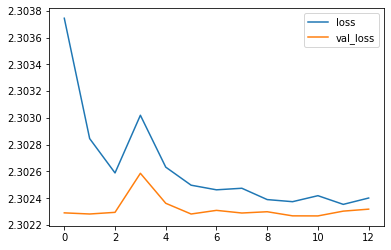

In [ ]:
loss[['loss', 'val_loss']].plot();

* Everything is just perfect no need of any feedback so go ahead as you are going.